<b>CLASSIFICATION: Rain in Australia </b>

The data for the classification part of our project has been taken from Kaggle. The URL for the data set is as follows:
    
URL: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Description of the dataset:
This dataset consists of weather observations taken across various weather stations in Australia for a duration of 10 years
We have chosen the target variable as RainTomorrow which would be used to predict if it would rain tomorrow in Australia or not. RainTomorrow is bivariate variable and can be one of the following values as output: 

1: Yes - It will rain tomorrow<br>
2: No - It will not rain tomorrow<br><br>

Features: 23 <br>
Instances: 145461 <br>
Missing data: Yes<br>
Categorical columns: 7 <br>

FEATURE DESCRIPTION:<br>

Date:- The date when the observation was taken <br>
Location:- Location where the observation was taken<br>
MinTemp:- The minimum temperature in degrees celsius on the date the observation was taken<br>
MaxTemp:- The maximum temperature in degrees celsius on the date the observation was taken<br>
Rainfall:- The amount of rainfall recorded for the day in mm<br>
Evaporation:- The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
Sunshine:- The number of hours of bright sunshine in the day.<br>
WindGustDir:- The direction of the strongest wind gust in the 24 hours to midnight<br>
WindGustSpeed:- The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
WindDir9am:- Direction of the wind taken at morning 9am<br>
WindDir3pm:- Direction of the wind taken atfternoon 3pm<br>
WindSpeed9am:- Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
WindSpeed3pm:- Wind speed (km/hr) averaged over 10 minutes prior to 3pm       
Humidity9am:- Humidity(percent)  observed at location at 9am on the day of the observation      
Humidity3pm:- Humidity(percent)  observed at location at 3pm on the day of the observation       
Pressure9am:- Atmospheric pressure (hpa) reduced to mean sea level at 9am        
Pressure3pm:- Atmospheric pressure (hpa) reduced to mean sea level at 3pm        
Cloud9am:- Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.<br>
Cloud3pm:- Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths.<br>
Temp9am:- Temperature in degrees celsius observed at location at 9am on the day of the observation<br> 
Temp3pm:- Temperature in degrees celsius observed at location at 3pm on the day of the observation<br> 
RainToday:- Boolean value indicating if precipitation (mm) in the 24 hours to 9am exceeds 1mm<br>
RainTomorrow:- The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br>

<b size="3">Importing general libraries for data cleaning and visualization</b>

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<b size="3">Loading the dataset into python</b>

In [2]:
df = pd.read_csv('weatherAUS.csv')

<b size="3">Displaying the data loaded</b>

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<b size="3">We will now, identify the total number of missing/null values in the dataset</b>

In [5]:
df.isnull().sum().sum()

343248

<b size="3">We can see that 343248 values are missing in the data. A description of the fields can be shown as follows:</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
len(df)

145460

<b size="3">Thus there are a total of 145460 observations in the data. this dataset is very huge for our analysis, and thus needs to be split randomly using train_test_split function into train and test data</b>

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)



In [9]:
len(test)

29092

<b size="3">We can see that we have 29092 observations in the test data, which we will be using for our analysis</b>

In [10]:
df = test

In [11]:
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))

train shape: (116368, 23)
test shape: (29092, 23)


# Performing the Analysis on the data

In [12]:
df.RainToday.unique()

array(['Yes', 'No', nan], dtype=object)

In [13]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

# <u>DATA CLEANING</u></b>

<b size="3">Dropping all the observations which do not have values for either RainToday or RainTomorrow columns in the dataset, as they would not be useful for our analysis, since prediction would require training, and we cannot compute these missing values as it would introduce bias into the models.</b>

In [14]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [15]:
df.Location.unique()

array(['Darwin', 'Tuggeranong', 'MountGinini', 'NorahHead', 'Launceston',
       'Canberra', 'Walpole', 'MelbourneAirport', 'WaggaWagga', 'Penrith',
       'Dartmoor', 'PerthAirport', 'GoldCoast', 'Sydney', 'Ballarat',
       'Portland', 'NorfolkIsland', 'Watsonia', 'AliceSprings',
       'Townsville', 'Brisbane', 'CoffsHarbour', 'Mildura', 'Uluru',
       'SydneyAirport', 'Cairns', 'Bendigo', 'SalmonGums', 'Cobar',
       'Richmond', 'Witchcliffe', 'Adelaide', 'Albany', 'Williamtown',
       'Nuriootpa', 'MountGambier', 'Wollongong', 'Sale', 'Hobart',
       'Newcastle', 'Moree', 'Albury', 'Nhil', 'PearceRAAF',
       'BadgerysCreek', 'Perth', 'Melbourne', 'Katherine', 'Woomera'],
      dtype=object)

In [16]:
df.Date.unique()

array(['2017-03-10', '2015-03-16', '2013-04-01', ..., '2008-02-16',
       '2008-09-12', '2007-12-19'], dtype=object)

In [17]:
df.WindGustDir.unique()

array(['NNW', 'ENE', 'SW', 'WNW', 'NW', nan, 'SE', 'SSE', 'S', 'NNE', 'E',
       'ESE', 'WSW', 'W', 'NE', 'SSW', 'N'], dtype=object)

<b size="3">Since we are using this anlysis to predict whether it would rain the next day in Australia and not for a particular location. we can drop the colum for Location. And since prediction is being made for the next day and not related to a particular date, we can drop date column as well. <br>
Given that we have separate columns for observations of Wind Direction taken at 9am and 3pm,, we can drop the WindGustDir column as well.</b>

In [18]:
df.drop(['Date', 'Location','WindGustDir'], axis = 1, inplace = True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28101 entries, 142196 to 4109
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        27993 non-null  float64
 1   MaxTemp        28036 non-null  float64
 2   Rainfall       28101 non-null  float64
 3   Evaporation    16112 non-null  float64
 4   Sunshine       14717 non-null  float64
 5   WindGustSpeed  26207 non-null  float64
 6   WindDir9am     26070 non-null  object 
 7   WindDir3pm     27329 non-null  object 
 8   WindSpeed9am   27888 non-null  float64
 9   WindSpeed3pm   27560 non-null  float64
 10  Humidity9am    27804 non-null  float64
 11  Humidity3pm    27372 non-null  float64
 12  Pressure9am    25310 non-null  float64
 13  Pressure3pm    25304 non-null  float64
 14  Cloud9am       17631 non-null  float64
 15  Cloud3pm       16841 non-null  float64
 16  Temp9am        27966 non-null  float64
 17  Temp3pm        27527 non-null  float64
 18  Ra

<b size = "3"><u>DATA TRANSFORMATION</u></b>

<b size = "3">Imputing missing values for all the remaining columns</b>

<b size="3">Mean Imputation: </b><br>We will replace all missing values for MinTemp,MaxTemp,Rainfall,Evaporation,Pressure9am,Pressure3pm,Temp9am,Temp3pm and Sunshine features with the mean value of each feature

<b size="3">Median Imputation:</b><br>
We will replace all missing values for WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am and Cloud3pm features with the median value of each feature

In [20]:
df.MinTemp.isnull().value_counts()

False    27993
True       108
Name: MinTemp, dtype: int64

In [21]:
df["MinTemp"].replace(np.nan,round(df['MinTemp'].mean(),1),inplace=True)

In [22]:
df.MaxTemp.isnull().value_counts()

False    28036
True        65
Name: MaxTemp, dtype: int64

In [23]:
df["MaxTemp"].replace(np.nan,round(df['MaxTemp'].mean(),1),inplace=True)

In [24]:
df.Rainfall.isnull().value_counts()

False    28101
Name: Rainfall, dtype: int64

In [25]:
df["Rainfall"].replace(np.nan,round(df['Rainfall'].mean(),1),inplace=True) 

In [26]:
df.Evaporation.isnull().value_counts()

False    16112
True     11989
Name: Evaporation, dtype: int64

In [27]:
df["Evaporation"].replace(np.nan,round(df['Evaporation'].mean(),1),inplace=True)

In [28]:
df.Sunshine.isnull().value_counts()

False    14717
True     13384
Name: Sunshine, dtype: int64

In [29]:
df["Sunshine"].replace(np.nan,round(df['Sunshine'].mean(),1),inplace=True)

In [30]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142196,25.7,32.4,8.4,3.4,5.7,22.0,SSE,WNW,6.0,13.0,90.0,58.0,1010.9,1006.9,7.0,7.0,27.3,32.0,Yes,No
51229,6.6,23.6,0.0,5.5,7.6,31.0,SW,NNE,4.0,11.0,65.0,35.0,1017.4,1013.5,NaN,NaN,12.7,22.3,No,No
53555,3.3,12.0,0.0,5.5,7.6,41.0,WSW,WSW,15.0,19.0,92.0,75.0,NaN,NaN,NaN,NaN,5.4,10.4,No,No
20370,13.1,22.0,0.0,5.5,7.6,33.0,NW,NNW,9.0,13.0,85.0,60.0,1025.2,1020.5,NaN,NaN,14.1,20.6,No,No
135235,6.0,20.8,0.0,5.5,7.6,30.0,E,NNW,6.0,19.0,65.0,46.0,NaN,NaN,NaN,NaN,9.9,20.0,No,No


In [31]:
df.WindGustSpeed.isnull().value_counts()

False    26207
True      1894
Name: WindGustSpeed, dtype: int64

In [32]:
df["WindGustSpeed"].replace(np.nan,round(df['WindGustSpeed'].median(),0),inplace=True)

In [33]:
df.WindDir9am.isnull().value_counts()

False    26070
True      2031
Name: WindDir9am, dtype: int64

In [34]:
df.WindSpeed9am.isnull().value_counts()

False    27888
True       213
Name: WindSpeed9am, dtype: int64

In [35]:
df["WindSpeed9am"].replace(np.nan,round(df['WindSpeed9am'].median(),0),inplace=True)

In [36]:
df.WindSpeed3pm.isnull().value_counts()

False    27560
True       541
Name: WindSpeed3pm, dtype: int64

In [37]:
df["WindSpeed3pm"].replace(np.nan,round(df['WindSpeed3pm'].median(),0),inplace=True)

In [38]:
df.Humidity9am.isnull().value_counts()

False    27804
True       297
Name: Humidity9am, dtype: int64

In [39]:
df["Humidity9am"].replace(np.nan,round(df['Humidity9am'].median(),0),inplace=True)

In [40]:
df.Humidity3pm.isnull().value_counts()

False    27372
True       729
Name: Humidity3pm, dtype: int64

In [41]:
df["Humidity3pm"].replace(np.nan,round(df['Humidity3pm'].median(),0),inplace=True)

In [42]:
df.Pressure9am.isnull().value_counts()

False    25310
True      2791
Name: Pressure9am, dtype: int64

In [43]:
df["Pressure9am"].replace(np.nan,round(df['Pressure9am'].mean(),1),inplace=True)

In [44]:
df.Pressure3pm.isnull().value_counts()

False    25304
True      2797
Name: Pressure3pm, dtype: int64

In [45]:
df["Pressure3pm"].replace(np.nan,round(df['Pressure3pm'].mean(),1),inplace=True)

In [46]:
df.Cloud9am.isnull().value_counts()

False    17631
True     10470
Name: Cloud9am, dtype: int64

In [47]:
df.Cloud9am.unique()

array([ 7., nan,  1.,  6.,  8.,  4.,  2.,  5.,  0.,  3.])

In [48]:
df["Cloud9am"].replace(np.nan,round(df['Cloud9am'].median(),0),inplace=True)

In [49]:
df.Cloud3pm.isnull().value_counts()

False    16841
True     11260
Name: Cloud3pm, dtype: int64

In [50]:
df.Cloud3pm.unique()

array([ 7., nan,  6.,  3.,  8.,  4.,  1.,  5.,  2.,  0.])

In [51]:
df["Cloud3pm"].replace(np.nan,round(df['Cloud3pm'].median(),0),inplace=True)

In [52]:
df.Temp9am.isnull().value_counts()

False    27966
True       135
Name: Temp9am, dtype: int64

In [53]:
df["Temp9am"].replace(np.nan,round(df['Temp9am'].mean(),1),inplace=True)

In [54]:
df.Temp3pm.isnull().value_counts()

False    27527
True       574
Name: Temp3pm, dtype: int64

In [55]:
df["Temp3pm"].replace(np.nan,round(df['Temp3pm'].mean(),1),inplace=True)

In [56]:
df.RainToday.isnull().value_counts()

False    28101
Name: RainToday, dtype: int64

In [57]:
df.RainTomorrow.isnull().value_counts()

False    28101
Name: RainTomorrow, dtype: int64

<b size = "3"> <u>CREATING MAPPINGS FOR RAIN TODAY AND TOMORROW</u></b>

<b size="3">In statistical models, while converting any variables to a map, we give 0 to the lower occuring value and 1 for the highest occuring value. however, for our analysis, people would observe 0 --> No and 1 --> Yes. Thus, we have assigned 0 as No and 1 as yes for RainToday and RainTomorrow columns</b>

In [58]:
df.RainToday.value_counts()

No     21886
Yes     6215
Name: RainToday, dtype: int64

In [59]:
df["RainToday"]=df["RainToday"].map({"No":0,"Yes":1}).astype(int)

In [60]:
df["RainTomorrow"]=df["RainTomorrow"].map({"No":0,"Yes":1}).astype(int)

In [61]:
df.RainToday.value_counts()

0    21886
1     6215
Name: RainToday, dtype: int64

In [62]:
df.RainTomorrow.value_counts()

0    21882
1     6219
Name: RainTomorrow, dtype: int64

In [63]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142196,25.7,32.4,8.4,3.4,5.7,22.0,SSE,WNW,6.0,13.0,90.0,58.0,1010.9,1006.9,7.0,7.0,27.3,32.0,1,0
51229,6.6,23.6,0.0,5.5,7.6,31.0,SW,NNE,4.0,11.0,65.0,35.0,1017.4,1013.5,5.0,5.0,12.7,22.3,0,0
53555,3.3,12.0,0.0,5.5,7.6,41.0,WSW,WSW,15.0,19.0,92.0,75.0,1017.7,1015.3,5.0,5.0,5.4,10.4,0,0
20370,13.1,22.0,0.0,5.5,7.6,33.0,NW,NNW,9.0,13.0,85.0,60.0,1025.2,1020.5,5.0,5.0,14.1,20.6,0,0
135235,6.0,20.8,0.0,5.5,7.6,30.0,E,NNW,6.0,19.0,65.0,46.0,1017.7,1015.3,5.0,5.0,9.9,20.0,0,0


In [64]:
df.WindDir9am.unique()

array(['SSE', 'SW', 'WSW', 'NW', 'E', nan, 'SE', 'W', 'ESE', 'WNW', 'ENE',
       'NE', 'SSW', 'S', 'NNE', 'NNW', 'N'], dtype=object)

In [65]:
df.WindDir3pm.unique()

array(['WNW', 'NNE', 'WSW', 'NNW', nan, 'SE', 'ESE', 'NW', 'E', 'S',
       'SSE', 'SW', 'ENE', 'W', 'NE', 'SSW', 'N'], dtype=object)

In [66]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142196,25.7,32.4,8.4,3.4,5.7,22.0,SSE,WNW,6.0,13.0,90.0,58.0,1010.9,1006.9,7.0,7.0,27.3,32.0,1,0
51229,6.6,23.6,0.0,5.5,7.6,31.0,SW,NNE,4.0,11.0,65.0,35.0,1017.4,1013.5,5.0,5.0,12.7,22.3,0,0
53555,3.3,12.0,0.0,5.5,7.6,41.0,WSW,WSW,15.0,19.0,92.0,75.0,1017.7,1015.3,5.0,5.0,5.4,10.4,0,0
20370,13.1,22.0,0.0,5.5,7.6,33.0,NW,NNW,9.0,13.0,85.0,60.0,1025.2,1020.5,5.0,5.0,14.1,20.6,0,0
135235,6.0,20.8,0.0,5.5,7.6,30.0,E,NNW,6.0,19.0,65.0,46.0,1017.7,1015.3,5.0,5.0,9.9,20.0,0,0


In [67]:
print(df.WindDir9am.value_counts())
print(df.WindDir3pm.value_counts())


N      2308
E      1826
SE     1825
SSE    1721
S      1659
NW     1647
W      1638
SW     1575
NNE    1543
ESE    1540
NNW    1533
SSW    1522
ENE    1507
NE     1463
WNW    1388
WSW    1375
Name: WindDir9am, dtype: int64
SE     2136
W      1924
S      1871
WSW    1864
SW     1777
SSE    1758
N      1756
WNW    1734
ESE    1717
NW     1626
E      1621
NE     1602
ENE    1567
SSW    1542
NNW    1526
NNE    1308
Name: WindDir3pm, dtype: int64


<b size="3">Based on the above output, we can see the unique values for WindDir9am and WindDir3pm columns. Thus if we perform a one-hot vector encoding for these columns, it will generate many columns, and thus we are removing observations having the below values in these columns</b>

In [68]:
windDir = ['SSE','NNE','NNW','ENE','SSW','ESE','WNW','WSW']

df = df[~df.WindDir9am.isin(windDir)]

df = df[~df.WindDir3pm.isin(windDir)]

In [69]:
len(df)

8837

In [70]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
46260,6.4,18.9,0.6,1.6,7.6,39.0,NaN,NaN,13.0,19.0,83.0,40.0,1017.7,1015.3,5.0,5.0,13.7,17.1,0,0
129728,16.8,19.8,0.2,5.5,7.6,35.0,SE,SE,15.0,17.0,74.0,82.0,1016.1,1015.0,5.0,5.0,18.7,18.6,0,1
47615,5.5,16.5,0.0,5.5,7.6,69.0,NW,NW,22.0,44.0,63.0,40.0,1015.8,1011.1,5.0,5.0,9.8,15.1,0,0
82709,7.5,19.4,1.2,4.2,8.1,37.0,W,SW,9.0,19.0,92.0,57.0,1019.0,1019.2,5.0,5.0,11.9,18.3,1,0
67027,14.7,30.2,0.0,6.0,12.7,39.0,NW,S,9.0,22.0,68.0,42.0,1018.7,1015.3,1.0,3.0,19.3,28.8,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8837 entries, 46260 to 73822
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8837 non-null   float64
 1   MaxTemp        8837 non-null   float64
 2   Rainfall       8837 non-null   float64
 3   Evaporation    8837 non-null   float64
 4   Sunshine       8837 non-null   float64
 5   WindGustSpeed  8837 non-null   float64
 6   WindDir9am     7535 non-null   object 
 7   WindDir3pm     8193 non-null   object 
 8   WindSpeed9am   8837 non-null   float64
 9   WindSpeed3pm   8837 non-null   float64
 10  Humidity9am    8837 non-null   float64
 11  Humidity3pm    8837 non-null   float64
 12  Pressure9am    8837 non-null   float64
 13  Pressure3pm    8837 non-null   float64
 14  Cloud9am       8837 non-null   float64
 15  Cloud3pm       8837 non-null   float64
 16  Temp9am        8837 non-null   float64
 17  Temp3pm        8837 non-null   float64
 18  Rai

<b size="3"><u>Mode Imputation:</u></b><br>
We are replacing all missing values for WindDir9am and WindDir3pm features with highest occuring values for those features.   

In [72]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace = True)
df['WindDir9am'].value_counts()

N     2581
SE     960
E      957
NW     910
S      890
SW     885
W      855
NE     799
Name: WindDir9am, dtype: int64

In [73]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace = True)
df['WindDir3pm'].value_counts()

SE    1875
W     1084
S     1061
N     1055
NW     985
SW     964
NE     922
E      891
Name: WindDir3pm, dtype: int64

<b size = "3"><u>ONE-HOT VECTOR ENCODING</u></b>

Now performing the one-hot vector encoding for WindDir9am and WindDir3pm features

In [74]:
cols=pd.get_dummies(df["WindDir9am"],prefix="WindDir9am")
df[cols.columns]=cols
df.drop("WindDir9am",axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,RainToday,RainTomorrow,WindDir9am_E,WindDir9am_N,WindDir9am_NE,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SW,WindDir9am_W
46260,6.4,18.9,0.6,1.6,7.6,39.0,SE,13.0,19.0,83.0,...,0,0,0,1,0,0,0,0,0,0
129728,16.8,19.8,0.2,5.5,7.6,35.0,SE,15.0,17.0,74.0,...,0,1,0,0,0,0,0,1,0,0
47615,5.5,16.5,0.0,5.5,7.6,69.0,NW,22.0,44.0,63.0,...,0,0,0,0,0,1,0,0,0,0
82709,7.5,19.4,1.2,4.2,8.1,37.0,SW,9.0,19.0,92.0,...,1,0,0,0,0,0,0,0,0,1
67027,14.7,30.2,0.0,6.0,12.7,39.0,S,9.0,22.0,68.0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
cols=pd.get_dummies(df["WindDir3pm"],prefix="WindDir3pm")
df[cols.columns]=cols
df.drop("WindDir3pm",axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_SW,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SW,WindDir3pm_W
46260,6.4,18.9,0.6,1.6,7.6,39.0,13.0,19.0,83.0,40.0,...,0,0,0,0,0,0,0,1,0,0
129728,16.8,19.8,0.2,5.5,7.6,35.0,15.0,17.0,74.0,82.0,...,0,0,0,0,0,0,0,1,0,0
47615,5.5,16.5,0.0,5.5,7.6,69.0,22.0,44.0,63.0,40.0,...,0,0,0,0,0,1,0,0,0,0
82709,7.5,19.4,1.2,4.2,8.1,37.0,9.0,19.0,92.0,57.0,...,0,1,0,0,0,0,0,0,1,0
67027,14.7,30.2,0.0,6.0,12.7,39.0,9.0,22.0,68.0,42.0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8837 entries, 46260 to 73822
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8837 non-null   float64
 1   MaxTemp        8837 non-null   float64
 2   Rainfall       8837 non-null   float64
 3   Evaporation    8837 non-null   float64
 4   Sunshine       8837 non-null   float64
 5   WindGustSpeed  8837 non-null   float64
 6   WindSpeed9am   8837 non-null   float64
 7   WindSpeed3pm   8837 non-null   float64
 8   Humidity9am    8837 non-null   float64
 9   Humidity3pm    8837 non-null   float64
 10  Pressure9am    8837 non-null   float64
 11  Pressure3pm    8837 non-null   float64
 12  Cloud9am       8837 non-null   float64
 13  Cloud3pm       8837 non-null   float64
 14  Temp9am        8837 non-null   float64
 15  Temp3pm        8837 non-null   float64
 16  RainToday      8837 non-null   int32  
 17  RainTomorrow   8837 non-null   int32  
 18  Win

In [77]:
(df.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
WindDir9am_E     0
WindDir9am_N     0
WindDir9am_NE    0
WindDir9am_NW    0
WindDir9am_S     0
WindDir9am_SE    0
WindDir9am_SW    0
WindDir9am_W     0
WindDir3pm_E     0
WindDir3pm_N     0
WindDir3pm_NE    0
WindDir3pm_NW    0
WindDir3pm_S     0
WindDir3pm_SE    0
WindDir3pm_SW    0
WindDir3pm_W     0
dtype: int64

<b size = "3">Based on the above output, we can see that we do not have any more missing values in the dataset and thus can begin with our next steps of visualization</b>

# <u>Visualization</u>

<b size = "3">Generating Scatter plot matrix for first 10 colums to identify correlation

array([[<AxesSubplot:xlabel='MinTemp', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Rainfall', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Evaporation', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Sunshine', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindGustSpeed', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindSpeed9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindSpeed3pm', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Humidity9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Humidity3pm', ylabel='MinTemp'>],
       [<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MaxTemp', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='Rainfall', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='Evaporation', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='WindGustSpeed', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='

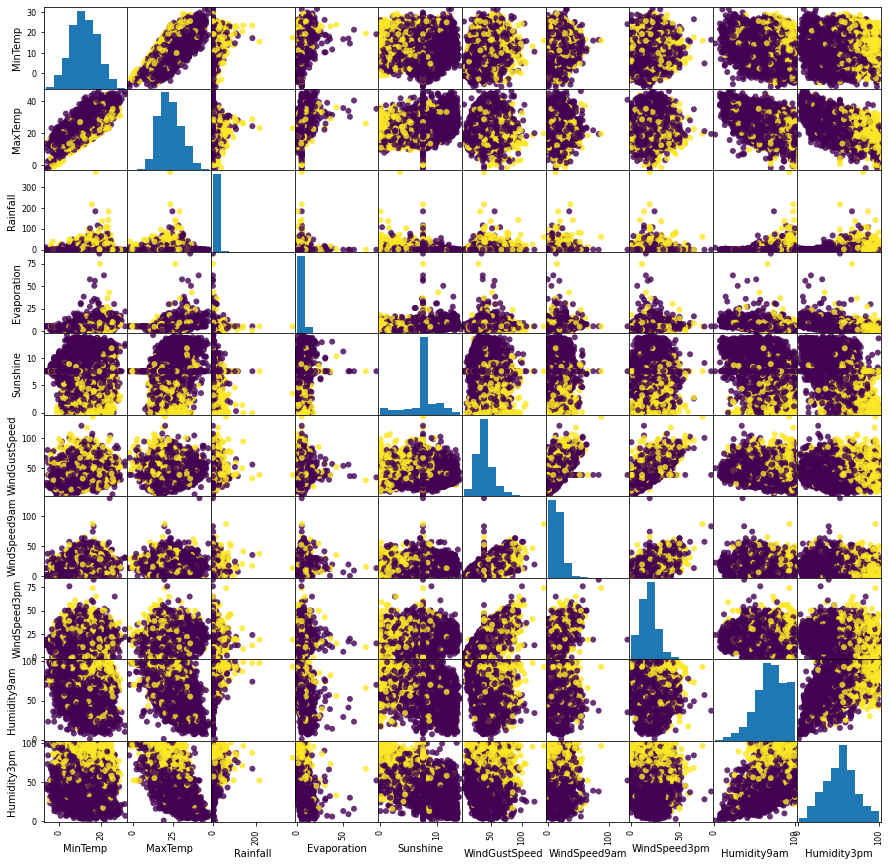

In [78]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = df.columns[:10]
scatter_matrix(df[attributes], figsize = (15,15), c = df.RainTomorrow, alpha = 0.8, marker = 'O')

<b>FINDINGS FROM SCATTER MATRIX:</b><br>
Below are the findings from the above output:
1. MinTemp and MaxTemp are postively correlated with each other. 
2. WindGustSpeed is positively correlated with WindSpeed9am and WindSpeed3pm
3. Humidity9am and Humidity3pm are slight correlated with each other
4. MinTemp and Humidity3pm are almost normally distributed
5. Humidity9am is left skewed
6. Windspeed9am, Windspeed3pm and Wind gustSpeed are right skewed

<b size = "3">Generating heat map for identifying correlation of all columns</b>

<AxesSubplot:>

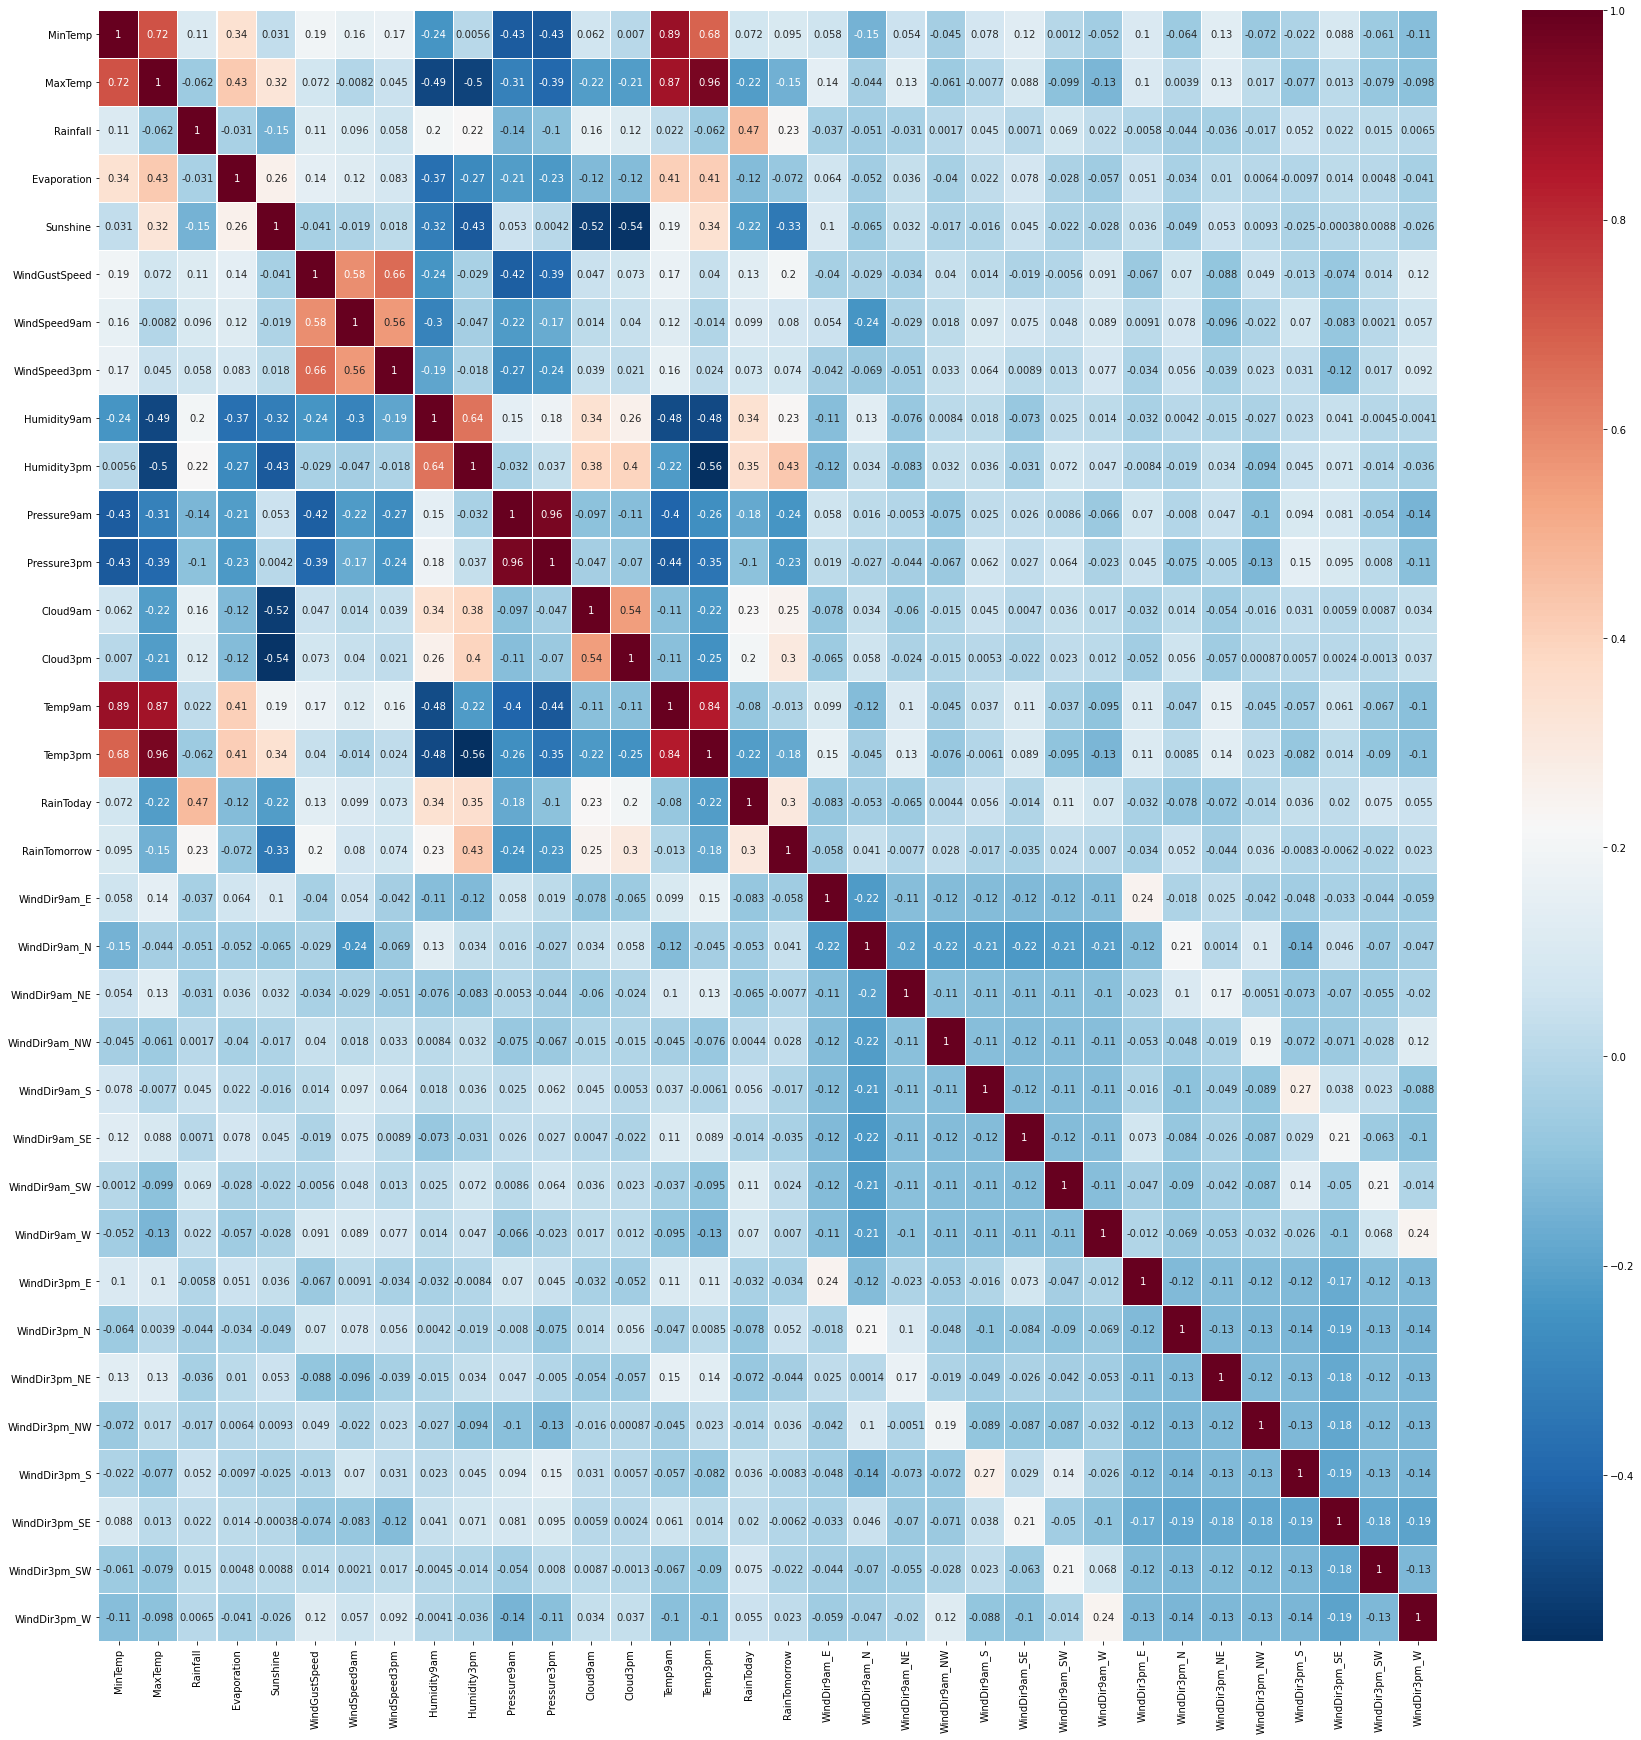

In [79]:
df_corr = df.corr()

import seaborn as sns
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_corr, annot=True,cmap="RdBu_r",linewidths=0.15,ax=ax)

<b size ="3"> FINDINGS FROM HEATMAP:</b><br>
Based on the above output, we can make the following observations:
1. All cells marked in Red are more correlated with each other
2. Pressure9am and Pressure3pm features are highly correlated
3. Temp9am and Temp3pm features are highly correlated
4. Temp9am, Temp3pm , MinTemp and MaxTemp features are correlated

 <b size = "3">Subplots of Features</b>

<AxesSubplot:xlabel='RainTomorrow', ylabel='RainToday'>

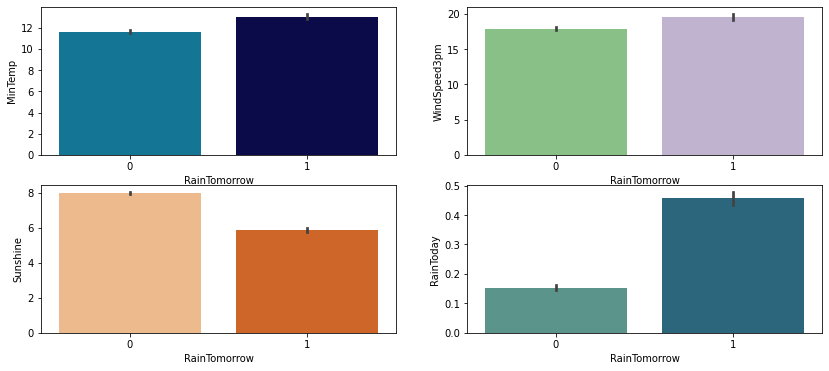

In [80]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.barplot(x='RainTomorrow',y='MinTemp',data=df,palette='ocean_r')
plt.subplot(2,2,2)
sns.barplot(x='RainTomorrow',y='WindSpeed3pm',data=df,palette='Accent')
plt.subplot(2,2,3)
sns.barplot(x='RainTomorrow',y='Sunshine',data=df,palette='Oranges')
plt.subplot(2,2,4)
sns.barplot(x='RainTomorrow',y='RainToday',data=df,palette='crest')

<b size = "3">Above output shows the relationship between the target variable and the MinTemp, Sunshine,WindSpeed3pm and RainToday features</b>

In [81]:
df.RainTomorrow.unique()

array([0, 1])

<b size = "3"><u>Train-Test Split</u></b>

<b size ="3"> Defining X and Y for all models</b>

In [82]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

<b size ="3"> Split dataset into Train and Test</b>

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [84]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

<b size ="3"><u>We ran the following classification models as part of our project: </u></b>
1. KNN Classification
2. Logistic Regression
3. Linear support vector machine
4. Kerenilized Support Vector Machine (rbf,poly and linear)
5. Decision Tree classifier

# K Neighbors Classifier

<b size ="3"> Importing libraries for KNN model</b>

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

<b size ="3"> Grid Search using Cross Validation to find the best hyper paramter - k</b>

In [86]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [87]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,return_train_score=True, scoring='roc_auc')

In [88]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='roc_auc')

In [89]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 21}
Best cross-validation score: 0.78


<b size ="3"> Best Parameter value K: 21 and Best Cross-validation score:0.80</b>

In [90]:
scores = grid_search_knn.cv_results_.get('mean_test_score').tolist()

<b size ="3"> Plot Accuracy and n-neighbours</b>

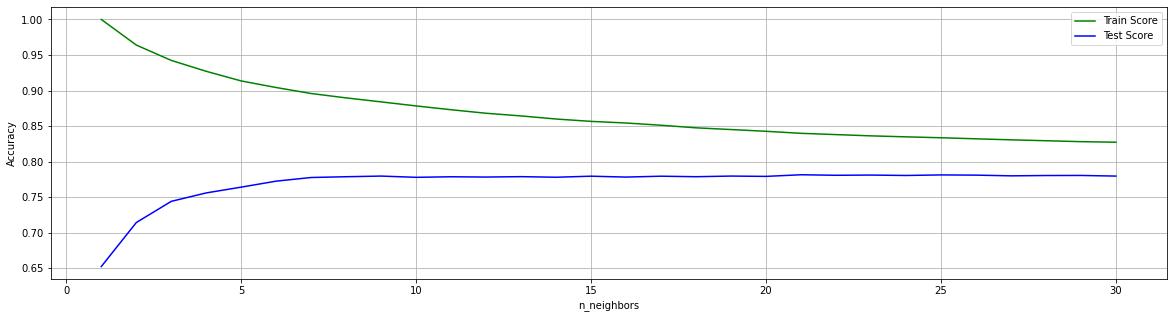

In [91]:
x_axis = k_range
%matplotlib inline

test_scores=grid_search_knn.cv_results_.get('mean_test_score').tolist()
train_scores=grid_search_knn.cv_results_.get('mean_train_score').tolist()

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_scores, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_scores, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

<b size ="3">Plot Test cross-validated Accuracy and value of K </b>

Text(0, 0.5, 'Test Cross-Validated Accuracy')

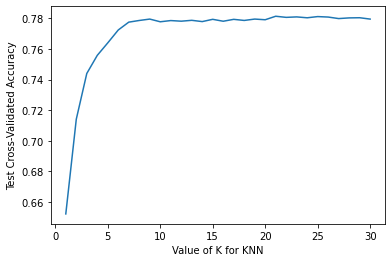

In [92]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Cross-Validated Accuracy')

In [93]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score

knn = KNeighborsClassifier(21)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_pred_knn,y_test)
f1_knn = f1_score(y_pred_knn,y_test)

train_score_knn = knn.score(X_train, y_train)
test_score_knn = knn.score(X_test, y_test)

print("Below are the findings from KNN model:")
print("")
print("Best Score: ",grid_search_knn.best_score_)
print("Best Parameter: ",grid_search_knn.best_params_)
print("Best Estimator: ",grid_search_knn.best_estimator_)
print("Confusion Matrix :\n{}".format(cm_knn))
print("F1 score: {}".format(f1_knn))
print('Train score: {:.4f}'.format(train_score_knn))
print('Test score: {:.4f}'.format(test_score_knn))

Below are the findings from KNN model:

Best Score:  0.781414817155609
Best Parameter:  {'n_neighbors': 21}
Best Estimator:  KNeighborsClassifier(n_neighbors=21)
Confusion Matrix :
[[1663  349]
 [  63  135]]
F1 score: 0.3958944281524927
Train score: 0.8233
Test score: 0.8136


# Logistic Regression

<b size ="3"> Grid Search using Cross Validation to find the best parameter</b>

In [94]:
from sklearn.linear_model import LogisticRegression
c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid = {"C": c_range , "penalty":["l1","l2"],"solver":["liblinear"]}# l1 lasso l2 ridge
logreg = LogisticRegression(max_iter = 10000)
logreg_cv = GridSearchCV(logreg,grid,cv= 5)
logreg_cv.fit(X_train,y_train)


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.8435179145678589


<b size ="3">Plotting Train and Test scores</b> 

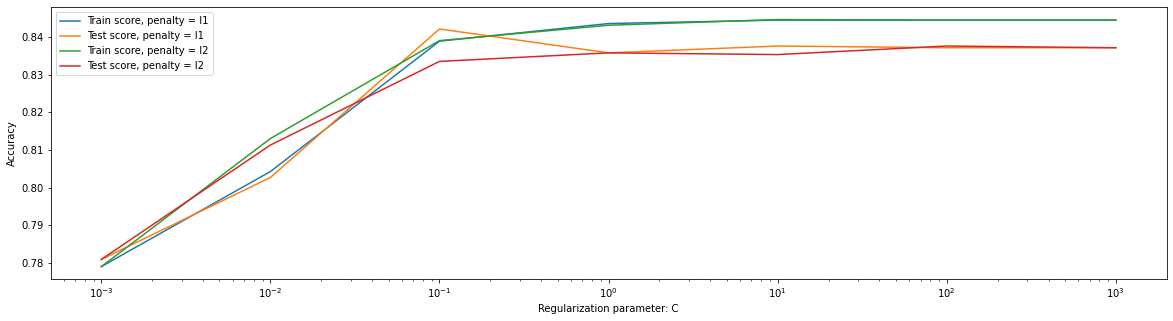

In [95]:
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

<b size ="3">Generating Classification Report for Logistic Regression model</b>

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg_cv.predict(X_test) , target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1726
           1       0.69      0.46      0.55       484

    accuracy                           0.84      2210
   macro avg       0.77      0.70      0.72      2210
weighted avg       0.82      0.84      0.82      2210



<b size ="3">Plotting Decision Boundary for Logistic Regression Model </b>

Text(0.5, 1.0, 'Logistic Regression with post-preocessing of results')

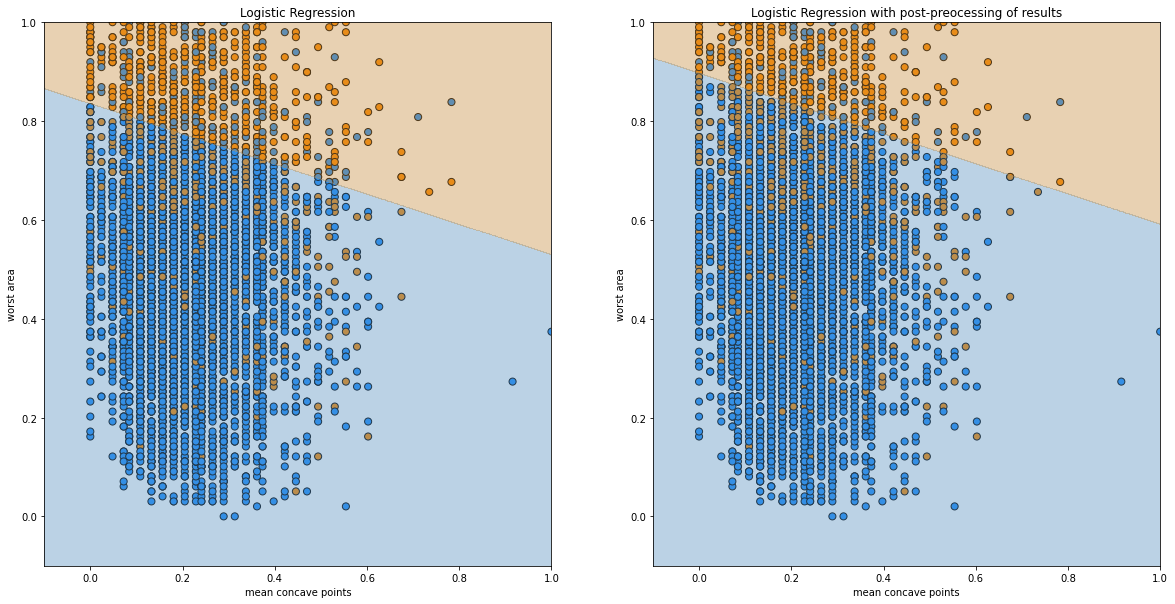

In [97]:
import matplotlib 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (20,10))
xaxis = np.linspace(0,1, 100)

X_b = X_train[200:, [7,9]]
y_b = y_train[200:]

lreg = LogisticRegression(C = 10, penalty = 'l2')
lreg.fit(X_b, y_b) 

plt.subplot(1,2,1)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression with post-preocessing of results')

In [98]:
from sklearn.metrics import confusion_matrix

log_l1 = LogisticRegression(penalty = 'l2', C = 10, solver = 'lbfgs', max_iter = 500)
log_l1.fit(X_train, y_train)
train_score_logreg = (log_l1.score(X_train, y_train))
test_score_logreg = (log_l1.score(X_test, y_test))

y_pred_logreg = log_l1.predict(X_test)
cm_logreg = confusion_matrix(y_pred_logreg,y_test)
f1_logreg = f1_score(y_pred_logreg,y_test)

print("Below are the findings from the Logistic regression model:")
print("")
print("Confusion Matrix :\n{}".format(cm_logreg))
print("F1 score: {}".format(f1_logreg))
print('Train Score',train_score_logreg)
print('Test Score' ,test_score_logreg)

Below are the findings from the Logistic regression model:

Confusion Matrix :
[[1624  262]
 [ 102  222]]
F1 score: 0.5495049504950495
Train Score 0.8445752225743172
Test Score 0.8352941176470589


# Linear Support Vector Machine

<b size ="3"> Running grid search to identify best parameter and score for LSVM </b>

In [99]:
from sklearn.svm import LinearSVC

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
    svm = LinearSVC(C=C,max_iter = 40000)
    svm.fit(X_train, y_train)
    
    score = svm.score(X_test, y_test)
   
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 6627   size of test set: 2210
Best score: 0.84
Best parameters: {'C': 0.1}


In [100]:
from sklearn.model_selection import cross_val_score
clf = LinearSVC()

clf.fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.84


In [101]:
train_score_lsvm = (clf.score(X_train, y_train))
test_score_lsvm = (clf.score(X_test, y_test))

y_pred_lsvm = clf.predict(X_test)
cm_lsvm = confusion_matrix(y_pred_lsvm,y_test)
f1_lsvm = f1_score(y_pred_lsvm,y_test)

print("Below are the findings for Linear Support Vector Machine:")
print("")
print("Confusion Matrix for LSVM:\n{}".format(cm_lsvm))
print("F1 score for LSVM: {}".format(f1_lsvm))
print('Train Score for LSVM: ',train_score_lsvm)
print('Test Score for LSVM: ' ,test_score_lsvm)


Below are the findings for Linear Support Vector Machine:

Confusion Matrix for LSVM:
[[1631  262]
 [  95  222]]
F1 score for LSVM: 0.5543071161048689
Train Score for LSVM:  0.8441225290478346
Test Score for LSVM:  0.8384615384615385


# Kernelized Support Vector Machine

# SVC with Kernel Trick (kernel = "rbf")

In [102]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

<b size="3">Grid search to identify best parameters of C and gamma</b>

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)

In [104]:
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [105]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.84


<b size = "3">Using the best parameters find the train, test and F1 scores</b>

In [130]:
clf3 = SVC(kernel='rbf', gamma=0.01, C=100)
clf3.fit(X_train, y_train)

train_score_rbf = (clf3.score(X_train, y_train))
test_score_rbf = (clf3.score(X_test, y_test))

y_pred_rbf = clf3.predict(X_test)
cm_rbf = confusion_matrix(y_pred_rbf,y_test)
f1_rbf = f1_score(y_pred_rbf,y_test)

print("Below are the findings for Kerenilzed Support Vector Machine with rbf:")
print("")
print("Confusion Matrix :\n{}".format(cm_rbf))
print("F1 score: {}".format(f1_rbf))
print('Train Score',train_score_rbf)
print('Test Score' ,test_score_rbf)

Below are the findings for Kerenilzed Support Vector Machine with rbf:

Confusion Matrix :
[[1645  272]
 [  81  212]]
F1 score: 0.5456885456885456
Train Score 0.8488003621548211
Test Score 0.8402714932126697


# SVC with Kernel Trick (Kernel = "Poly")

In [107]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [1,2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


<b size = "3">Grid search for finding best parameters for C and degree</b>

In [108]:
grid_search_poly = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True)

In [109]:
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [110]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 10, 'degree': 2}
Best cross-validation score: 0.84


In [131]:
clf4 = SVC(kernel='poly', degree=2, C=10)
clf4.fit(X_train, y_train)

train_score_poly = (clf4.score(X_train, y_train))
test_score_poly = (clf4.score(X_test, y_test))

y_pred_poly = clf4.predict(X_test)
cm_poly = confusion_matrix(y_pred_poly,y_test)
f1_poly = f1_score(y_pred_poly,y_test)

print("Confusion Matrix :\n{}".format(cm_poly))
print("F1 score: {}".format(f1_poly))
print('Train Score',train_score_poly)
print('Test Score' ,test_score_poly)

Confusion Matrix :
[[1646  267]
 [  80  217]]
F1 score: 0.5556978233034571
Train Score 0.8604194960012072
Test Score 0.8429864253393665


# SVC with Kernel Trick (Kernel = "Linear")

In [112]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [113]:
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, return_train_score=True)

In [114]:
grid_search_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [115]:
print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linear.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.84


In [132]:
clf2 = SVC(kernel='linear', C=10)
clf2.fit(X_train, y_train)

train_score_linear = (clf2.score(X_train, y_train))
test_score_linear = (clf2.score(X_test, y_test))

y_pred_linear = clf2.predict(X_test)
cm_linear = confusion_matrix(y_pred_linear,y_test)
f1_linear = f1_score(y_pred_linear,y_test)

print("Confusion Matrix :\n{}".format(cm_linear))
print("F1 score: {}".format(f1_linear))
print('Train Score',train_score_linear)
print('Test Score' ,test_score_linear)

Confusion Matrix :
[[1635  270]
 [  91  214]]
F1 score: 0.5424588086185045
Train Score 0.842613550626226
Test Score 0.8366515837104073


# Graphs Kernel

([<matplotlib.axis.YTick at 0x10ea39c8ac0>,
 [Text(0, 0.5, '0.001'),
  Text(0, 1.5, '0.01'),
  Text(0, 2.5, '0.1'),
  Text(0, 3.5, '1'),
  Text(0, 4.5, '10'),
  Text(0, 5.5, '100')])

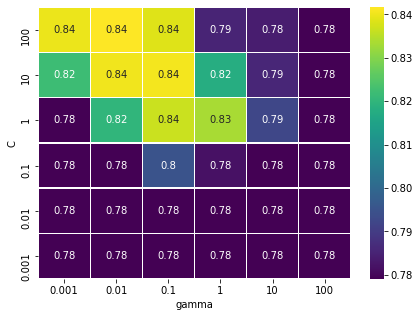

In [117]:
#rbf plot


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
scores = np.array(grid_search_rbf.cv_results_.get('mean_test_score')).reshape(6, 6)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xticks(np.arange(6)+0.5, [0.001, 0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(6)+0.5, [0.001, 0.01, 0.1, 1, 10, 100])

<b size="3">Plotting Dicision boundary for Linear SVC, SVC with Kernel (rbf, poly and linear)</b>

C:\Bindi\MSITM\UTD\Anaconda\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


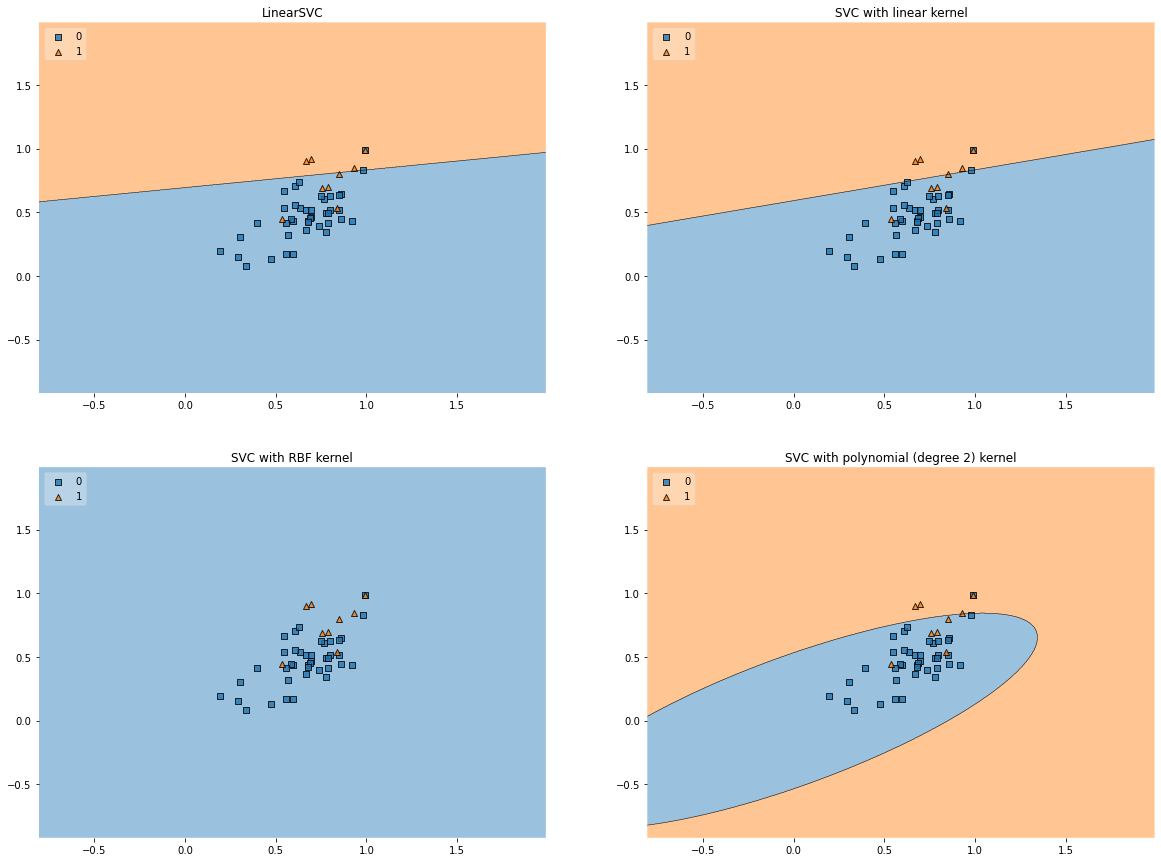

In [127]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

X_b = X_train[:50,[8,9]]
y_b = y_train[:50]


clf1 = LinearSVC(C=C,max_iter=40000)
clf2 = SVC(kernel='linear', C=100)
clf3 = SVC(kernel='rbf', gamma=0.01, C=10)
clf4 = SVC(kernel='poly', degree=2, C=10)


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b.values,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    
    


# Decision Tree

<b size="3">Grid search to identify Best parameter: max-depth, min_samples_leaf and min_samples_split</b>

In [119]:
from sklearn.tree import DecisionTreeClassifier

best_score =0
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    for min_samples_leaf in [10,25,50,75,100,125,150,175,200,225]:
        for min_samples_split in [10,50,100,150,200,250,300,350,400,450]:
            
            dtree = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,random_state=0)
            dtree.fit(X_train,y_train)
            score = dtree.score(X_test,y_test)
            
            if score > best_score:
                best_score = score
                best_parameters={'max_depth': max_depth,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
            
print('Best Score: {:.2f}'.format(best_score))
print('Best Parameter: {}'.format(best_parameters))

Best Score: 0.83
Best Parameter: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [120]:
dtree = DecisionTreeClassifier( max_depth=6,min_samples_leaf=25,min_samples_split=10, random_state=0)
dtree.fit(X_train,y_train)
train_score_dtree = dtree.score(X_train,y_train)
test_score_dtree = dtree.score(X_test,y_test)

y_pred_dtree = dtree.predict(X_test)
cm_dtree = confusion_matrix(y_pred_dtree,y_test)
f1_dtree = f1_score(y_pred_dtree,y_test)

print("Confusion Matrix :\n{}".format(cm_dtree))
print("F1 score: {}".format(f1_dtree))
print('Train Score',train_score_dtree)
print('Test Score' ,test_score_dtree)

Confusion Matrix :
[[1607  276]
 [ 119  208]]
F1 score: 0.5129469790382244
Train Score 0.8534781952618078
Test Score 0.8212669683257918


[Text(173.72616279069769, 201.90857142857143, 'X[9] <= 0.692\ngini = 0.344\nsamples = 6627\nvalue = [5163, 1464]'),
 Text(93.43255813953488, 170.84571428571428, 'X[2] <= 0.015\ngini = 0.237\nsamples = 5417\nvalue = [4673, 744]'),
 Text(57.42209302325581, 139.78285714285715, 'X[9] <= 0.581\ngini = 0.194\nsamples = 4811\nvalue = [4287, 524]'),
 Text(31.144186046511628, 108.72, 'X[5] <= 0.438\ngini = 0.151\nsamples = 3845\nvalue = [3528, 317]'),
 Text(15.572093023255814, 77.65714285714284, 'X[4] <= 0.67\ngini = 0.13\nsamples = 3511\nvalue = [3265, 246]'),
 Text(7.786046511627907, 46.59428571428572, 'X[5] <= 0.274\ngini = 0.165\nsamples = 2532\nvalue = [2303, 229]'),
 Text(3.8930232558139535, 15.531428571428563, 'gini = 0.104\nsamples = 1309\nvalue = [1237, 72]'),
 Text(11.67906976744186, 15.531428571428563, 'gini = 0.224\nsamples = 1223\nvalue = [1066, 157]'),
 Text(23.35813953488372, 46.59428571428572, 'X[9] <= 0.561\ngini = 0.034\nsamples = 979\nvalue = [962, 17]'),
 Text(19.46511627906

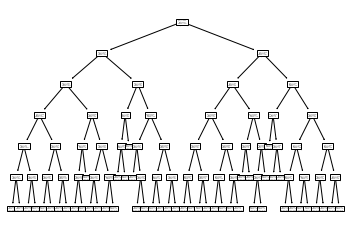

In [121]:
from sklearn import tree
tree.plot_tree(dtree)

<b size="3">Dicision Tree using Graphviz</b>

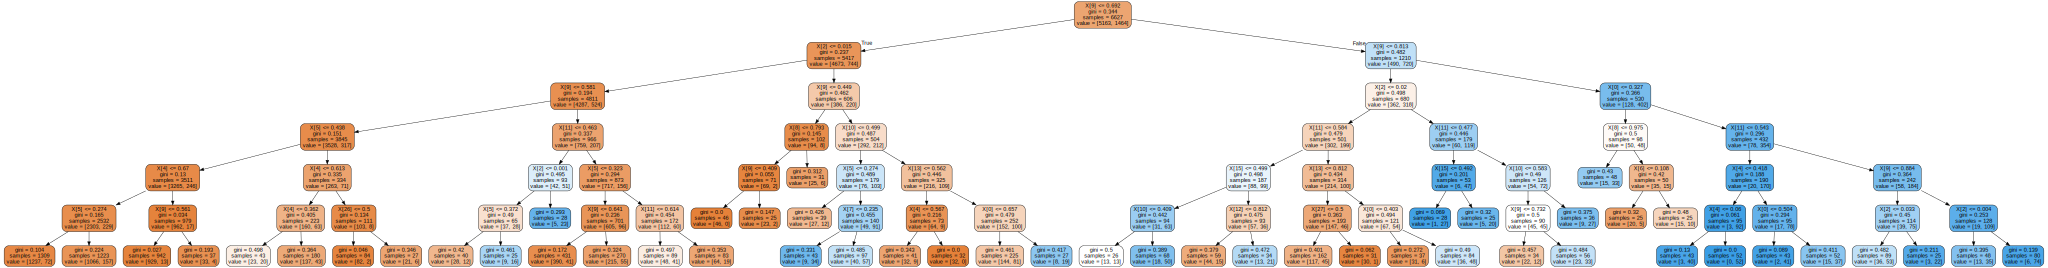

In [122]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

from sklearn.tree import export_graphviz

dot_data=export_graphviz(dtree,out_file=None, filled=True, rounded=True)

graph=graphviz.Source(dot_data)

graph

In [133]:
print("Below Test score values we got after running all models for Classification:")
print("")
print("Scores for K Neighbour classifier:")
print("Train :{}, Test :{} \n".format(train_score_knn,test_score_knn))
print("Scores for Logistic Regression:")
print("Train :{}, Test :{} \n".format(train_score_logreg,test_score_logreg))
print("Scores for Linear Support Vector Machine:")
print("Train :{}, Test :{} \n".format(train_score_lsvm,test_score_lsvm))
print("Scores for Kernel with rbf:")
print("Train :{}, Test :{} \n".format(train_score_rbf,test_score_rbf))
print("Scores for Kernel with poly:")
print("Train :{}, Test :{} \n".format(train_score_poly,test_score_poly))
print("Scores for Kernel with linear:")
print("Train :{}, Test :{} \n".format(train_score_linear,test_score_linear))
print("Scores for Decision Tree:")
print("Train :{}, Test :{} \n".format(train_score_dtree,test_score_dtree))


Below Test score values we got after running all models for Classification:

Scores for K Neighbour classifier:
Train :0.8232986268296363, Test :0.8135746606334842 

Scores for Logistic Regression:
Train :0.8445752225743172, Test :0.8352941176470589 

Scores for Linear Support Vector Machine:
Train :0.8441225290478346, Test :0.8384615384615385 

Scores for Kernel with rbf:
Train :0.8488003621548211, Test :0.8402714932126697 

Scores for Kernel with poly:
Train :0.8604194960012072, Test :0.8429864253393665 

Scores for Kernel with linear:
Train :0.842613550626226, Test :0.8366515837104073 

Scores for Decision Tree:
Train :0.8534781952618078, Test :0.8212669683257918 



# Evaluation of Model

<b size ="3">Based on the above output, we can see the train and test score for each of the models. Thus, we can conclude that for this data, Kernel with poly model is the best fit for our classification prediction. <br>Hence we are using the Kernel with poly model to predict if it will rain in Australia the next day</b>

# Predicting target values using Kernel 'poly'

In [134]:
import numpy as np
np.set_printoptions(threshold=np.inf)

clf = SVC(kernel='poly', degree=2, C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)


clf = LinearSVC(C=C,max_iter = 40000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 

# Evaluation stretegy for final model

<b size="3">As our dataset is highly imbalanced, we used confusion metric to evaluate the best model Kernel with Poly</b>

In [140]:
from sklearn.metrics import accuracy_score, roc_auc_score

clf = SVC(kernel='poly', degree=2, C=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_pred_linear,y_test)

print("Confusion Matrix :\n{}".format(cm))

Confusion Matrix :
[[1635  270]
 [  91  214]]


<b size = "3">We can find accuracy using confusion matrix using below formula:<br><br>
Accuracy = (TP + TN) / (TP+TN+FP+FN)
<br><br>
where, <br>
TP = True Positive <br>
TN = True Negative <br>
FP = False Positive <br>
FN = False Negative </b>

In [144]:
Accuracy_cm = (1635+214)/(1635+214+270+91)
print("Accuracy:",Accuracy_cm)

Accuracy: 0.8366515837104073


<b size = "3">Based on the Confusion metric Accuracy, we can see that Accuracy is 0.8366.</b>

<b size="3">Generating Classification Report Kernel = Poly model</b>

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test) , target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1726
           1       0.73      0.45      0.56       484

    accuracy                           0.84      2210
   macro avg       0.80      0.70      0.73      2210
weighted avg       0.83      0.84      0.83      2210

